# Installing important module

In [1]:
!pip install tensorflow backend

# Importing modules

In [26]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

# Installing Kaggle for importing its dataset using the API

In [3]:
!pip install kaggle

# Creating a Directory and moving kaggle.json file to it

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory


# Downloading the ASL dataset from kaggle using there API command

In [5]:
!kaggle datasets download -d datamunge/sign-language-mnist

sign-language-mnist.zip: Skipping, found more recently modified local copy (use --force to force download)


# Extracting the dataset

In [6]:
from zipfile import ZipFile
dataset = "sign-language-mnist.zip"
with ZipFile(dataset, "r") as zip:
    zip.extractall()
    print("data is extracted")

data is extracted


# Now we can play with the data!

Use Pandas to read CSV files of train and test

In [17]:
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

Use Head command to view first five rows of the dataset

In [18]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


# Data Visualization and Preprocessing

<Axes: xlabel='label', ylabel='count'>

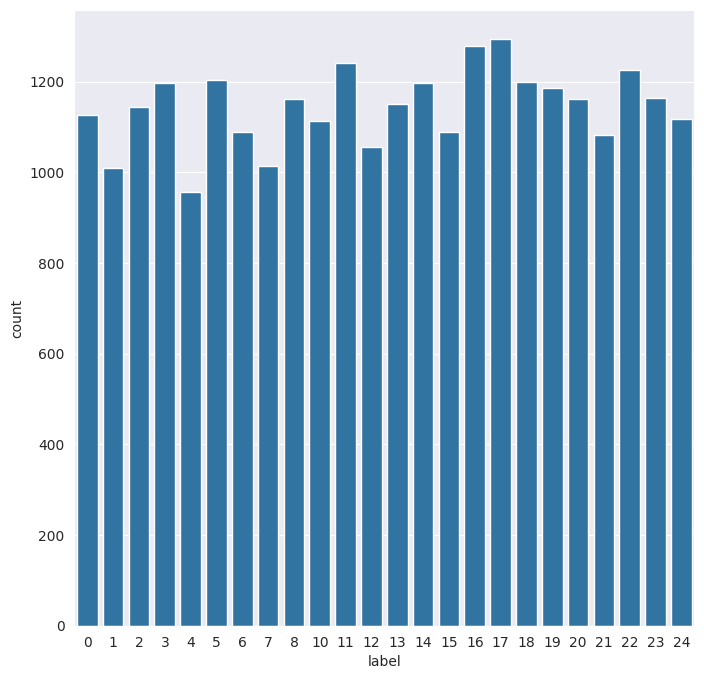

In [19]:
plt.figure(figsize=(8,8)) # set any size you want
sns.set_style("darkgrid") # we can use white,dark,whitegrid,darkgrid,ticks etc as per our requirements
sns.countplot(data=train_df, x="label")

The dataset seems balanced as for each training label , enough training examples exist

In [20]:
train_df_only_labels = train_df["label"]
test_df_only_labels =  test_df["label"]
del train_df["label"]
del test_df["label"]

In [27]:
LabelBinarizer = LabelBinarizer()
y_train = LabelBinarizer.fit_transform(train_df_only_labels) # this convert all the labels in binary form: (0s and 1s)
y_test = LabelBinarizer.fit_transform(test_df_only_labels)

Now I will assign all the values of the dataset except the "labels" to the new variables

In [33]:
x_train = train_df.values
x_test = test_df.values

Now we will perform a grayscale normalization to reduce the effect of illumination's differences.Moreover the CNN converges faster on [0..1] data than on [0..255].

In [35]:
# Normalizing the data
x_train = x_train/255
x_test = x_test/255

Reshaping the data from 1-D to 3-D as required through input by CNN's


In [36]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Preview of first ten images

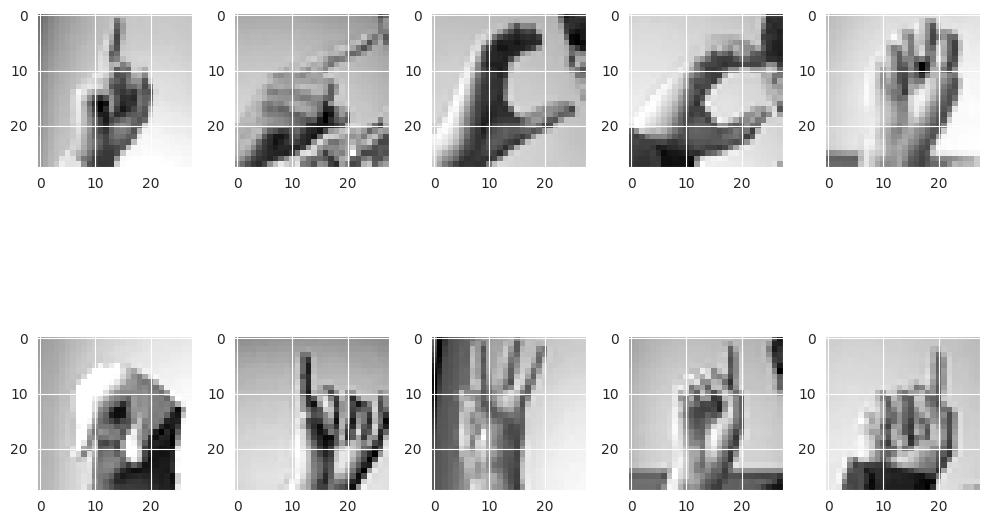

In [53]:
f, ax=plt.subplots(2, 5)
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(x_train[k].reshape(28,28), cmap = "gray")
        k+=1
    plt.tight_layout()